### Simulação do Cenário 2 - Opção 2 - Proposta

In [1]:
import random
from quantumnet.components import Network, Host, Controller
from quantumnet.components import ServerNode, ClientNode, RegularNode
from quantumnet.objects import Qubit, Logger

Hosts inicializados
Canais inicializados
Pares EPRs adicionados
Topologia configurada com sucesso para slices!


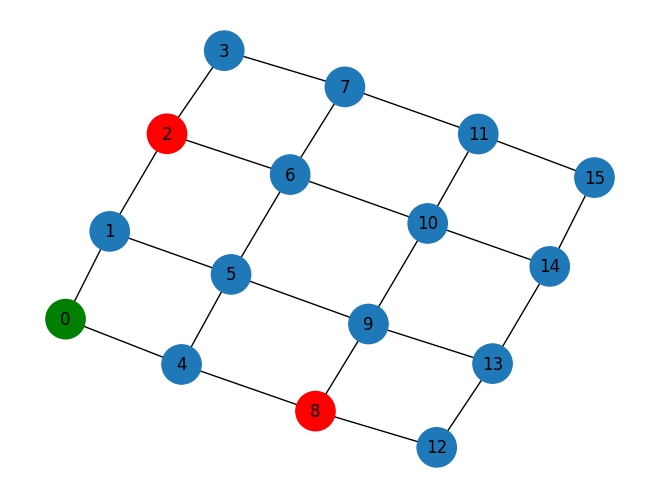

Final Slice 1 Paths: [[8, 4, 0]]
Final Slice 2 Paths: [[2, 6, 5, 4, 0]]


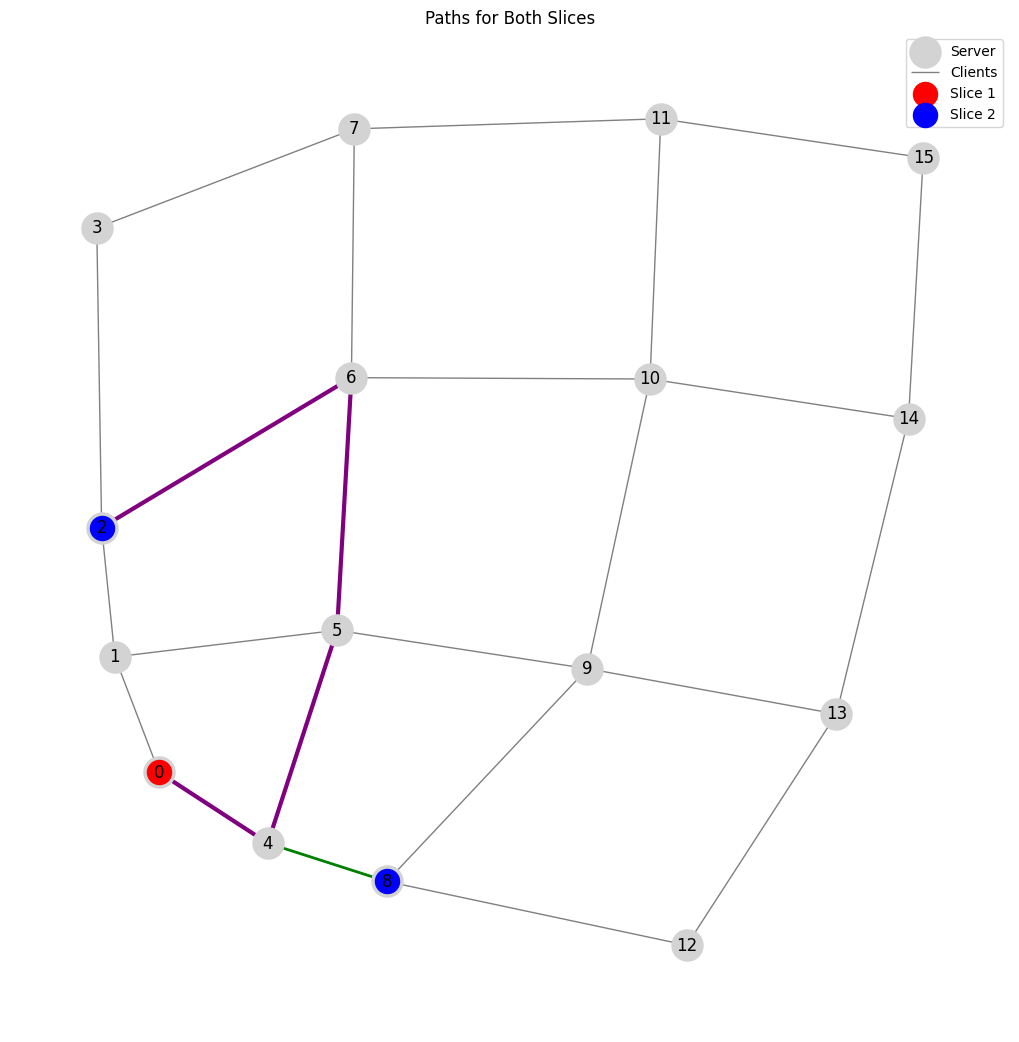

In [2]:
rede = Network()
controlador = Controller(rede)

# Configura uma grade 4x4
clients = [8, 2]
server = 0
rede.set_topology_for_slices(graph_type='grade', dimensions=(4, 4), clients=clients, server=server)


rede.draw()

# Executa a simulação de slices
rede.run_slice_simulation(clients=clients, server=server)
Logger.activate(Logger)



### Nessa parte, eu posso gerar minha requesições, com os protocolos: Childs(AC_BQC) e BFK_BQC.

##### O cenário 2 apresenta o agendamento das requesições de forma que pode-se executar uma requesição de cada protocolo, então a cada timeslot pode-se executar até duas requesições.  

In [3]:
slice_1_paths = rede.final_slice_1_paths  
slice_2_paths = rede.final_slice_2_paths  

controlador.initialize_slices(network=rede, clients=[14,2], server=0, protocols=["AC_BQC", "BFK_BQC"], slice_1_paths=slice_1_paths, slice_2_paths=slice_2_paths)

for _ in range(10):
    protocol = random.choice(["AC_BQC","BFK_BQC"])
    if protocol == "AC_BQC":
        alice_id = 8
        slice_path = rede.final_slice_1_paths[0]  
    elif protocol == "BFK_BQC":
        alice_id = 2
        slice_path = rede.final_slice_2_paths[0]  
    bob_id = 0
    num_qubits = 10
    num_gates = 20

    # Passa o slice_path para garantir a rota correta na requisição
    rede.generate_request_slice(alice_id, bob_id, num_qubits, num_gates, protocol=protocol, slice_path=slice_path,scenario=2)

scheduled_timeslots = rede.send_requests_to_controller(controlador)
slice_paths = controlador.slices  
rede.execute_scheduled_requests(scheduled_timeslots)


2025-01-05 22:10:09,221: Slice slice_1 configurado para protocolo AC_BQC com rotas: {'client': [8, 4, 0]}
2025-01-05 22:10:09,224: Slice slice_2 configurado para protocolo BFK_BQC com rotas: {'client': [2, 6, 5, 4, 0]}
2025-01-05 22:10:09,432: Circuito aleatório gerado com 10 qubits e 20 portas. Instruções sobre o circuito.
2025-01-05 22:10:09,433: Instrução: {'operation': 'h', 'qubits': [5]}
2025-01-05 22:10:09,434: Instrução: {'operation': 'swap', 'qubits': [3, 6]}
2025-01-05 22:10:09,434: Instrução: {'operation': 'swap', 'qubits': [3, 7]}
2025-01-05 22:10:09,435: Instrução: {'operation': 'z', 'qubits': [5]}
2025-01-05 22:10:09,435: Instrução: {'operation': 'cx', 'qubits': [9, 0]}
2025-01-05 22:10:09,436: Instrução: {'operation': 'h', 'qubits': [6]}
2025-01-05 22:10:09,436: Instrução: {'operation': 'cz', 'qubits': [6, 4]}
2025-01-05 22:10:09,437: Instrução: {'operation': 'x', 'qubits': [5]}
2025-01-05 22:10:09,438: Instrução: {'operation': 'swap', 'qubits': [8, 9]}
2025-01-05 22:10:0

               ┌───┐                                  
q_0: ──────────┤ X ├──────────────────────────────────
     ┌───┐┌───┐└─┬─┘                                  
q_1: ┤ Y ├┤ H ├──┼────────────────────────────────────
     └───┘└───┘  │                     ┌───┐          
q_2: ────────────┼───────────────X───■─┤ H ├──────────
                 │               │   │ └───┘┌───┐     
q_3: ───────X────┼───X───────────┼───┼───■──┤ Y ├─────
            │    │   │           │   │   │  └───┘     
q_4: ───────┼────┼───┼───────■───X───┼───■────────────
     ┌───┐  │    │   │ ┌───┐ │ ┌───┐ │                
q_5: ┤ H ├──┼────┼───┼─┤ Z ├─┼─┤ X ├─┼───X─────────■──
     └───┘  │    │   │ ├───┤ │ └───┘ │   │         │  
q_6: ───────X────┼───┼─┤ H ├─■───────┼───┼─────────┼──
                 │   │ └───┘         │   │         │  
q_7: ────────────┼───X───────────────┼───┼────■────┼──
                 │                   │   │    │    │  
q_8: ────────────┼───X───────────────■───X────■────┼──
          

2025-01-05 22:10:09,571: Circuito aleatório gerado com 10 qubits e 20 portas. Instruções sobre o circuito.
2025-01-05 22:10:09,571: Instrução: {'operation': 'x', 'qubits': [4]}
2025-01-05 22:10:09,571: Instrução: {'operation': 'cz', 'qubits': [7, 4]}
2025-01-05 22:10:09,572: Instrução: {'operation': 'cx', 'qubits': [8, 5]}
2025-01-05 22:10:09,572: Instrução: {'operation': 'cz', 'qubits': [2, 4]}
2025-01-05 22:10:09,573: Instrução: {'operation': 'cz', 'qubits': [4, 6]}
2025-01-05 22:10:09,575: Instrução: {'operation': 'swap', 'qubits': [6, 7]}
2025-01-05 22:10:09,575: Instrução: {'operation': 'y', 'qubits': [7]}
2025-01-05 22:10:09,576: Instrução: {'operation': 'swap', 'qubits': [3, 1]}
2025-01-05 22:10:09,577: Instrução: {'operation': 'x', 'qubits': [0]}
2025-01-05 22:10:09,577: Instrução: {'operation': 'cz', 'qubits': [7, 2]}
2025-01-05 22:10:09,578: Instrução: {'operation': 'z', 'qubits': [1]}
2025-01-05 22:10:09,580: Instrução: {'operation': 't', 'qubits': [8]}
2025-01-05 22:10:09,5

                                                                  
q_0: ─────■──────X───────────────────────X───X──────────────────X─
          │      │         ┌───┐         │   │       ┌───┐┌───┐ │ 
q_1: ─X───┼──────┼───────■─┤ S ├─────────┼───X───────┤ X ├┤ X ├─X─
      │ ┌─┴─┐    │       │ └───┘         │           └─┬─┘└─┬─┘   
q_2: ─┼─┤ X ├─■──┼───────┼───────────■───X─────────────┼────┼─────
      │ └───┘ │  │ ┌───┐ │ ┌───┐     │                 │    │     
q_3: ─X───────┼──┼─┤ X ├─┼─┤ X ├─────┼───────■─────────┼────┼─────
              │  │ └─┬─┘ │ └─┬─┘     │       │  ┌───┐  │    │     
q_4: ─────────┼──┼───┼───┼───■───X───┼───■───┼──┤ X ├──┼────┼─────
              │  │   │   │       │   │   │   │  └─┬─┘  │    │     
q_5: ─────────┼──┼───┼───┼───────┼───┼───┼───┼────┼────┼────■─────
        ┌───┐ │  │   │   │       │   │   │   │    │    │          
q_6: ───┤ H ├─┼──┼───┼───┼───────┼───┼───■───┼────■────┼──────────
        └───┘ │  │   │   │       │ ┌─┴─┐   ┌─┴─┐       │      

2025-01-05 22:10:09,780: Instrução: {'operation': 'cx', 'qubits': [9, 2]}
2025-01-05 22:10:09,782: Instrução: {'operation': 'h', 'qubits': [2]}
2025-01-05 22:10:09,782: Instrução: {'operation': 'x', 'qubits': [3]}
2025-01-05 22:10:09,783: Instrução: {'operation': 'h', 'qubits': [3]}
2025-01-05 22:10:09,783: Instrução: {'operation': 'cx', 'qubits': [1, 3]}
2025-01-05 22:10:09,783: Instrução: {'operation': 'cz', 'qubits': [4, 6]}
2025-01-05 22:10:09,784: Instrução: {'operation': 's', 'qubits': [6]}
2025-01-05 22:10:09,785: Instrução: {'operation': 'swap', 'qubits': [8, 0]}
2025-01-05 22:10:09,785: Instrução: {'operation': 'cx', 'qubits': [8, 0]}
2025-01-05 22:10:09,785: Instrução: {'operation': 'x', 'qubits': [9]}
2025-01-05 22:10:09,786: Instrução: {'operation': 'swap', 'qubits': [7, 1]}
2025-01-05 22:10:09,787: Instrução: {'operation': 'cx', 'qubits': [4, 5]}
2025-01-05 22:10:09,787: Instrução: {'operation': 't', 'qubits': [7]}
2025-01-05 22:10:09,788: Instrução: {'operation': 'cz', 'q

     ┌───┐     ┌───┐┌───┐             
q_0: ┤ Z ├─────┤ X ├┤ T ├─────────────
     ├───┤┌───┐└─┬─┘├───┤        ┌───┐
q_1: ┤ S ├┤ S ├──┼──┤ Y ├─X───■──┤ T ├
     ├───┤└───┘  │  └───┘ │ ┌─┴─┐└───┘
q_2: ┤ X ├───────┼────────┼─┤ X ├─────
     └───┘       │        │ └───┘     
q_3: ────────────┼────────┼───────────
                 │        │           
q_4: ────────────■────────┼───────────
                          │           
q_5: ─────────────────────┼───────────
                          │           
q_6: ─────────────────────┼───────────
     ┌───┐┌───┐           │           
q_7: ┤ Z ├┤ Z ├───────────┼───────────
     ├───┤└───┘           │      ┌───┐
q_8: ┤ H ├────────────────X───X──┤ S ├
     ├───┤┌───┐┌───┐┌───┐     │  ├───┤
q_9: ┤ X ├┤ T ├┤ Z ├┤ H ├─────X──┤ Y ├
     └───┘└───┘└───┘└───┘        └───┘
     ┌───┐             ┌───┐        ┌───┐          
q_0: ┤ Y ├───────■───■─┤ Z ├────────┤ X ├──────────
     └───┘       │   │ └───┘        └─┬─┘          
q_1: ───────■────┼───■───

2025-01-05 22:10:09,995: Circuito aleatório gerado com 10 qubits e 20 portas. Instruções sobre o circuito.
2025-01-05 22:10:09,995: Instrução: {'operation': 'y', 'qubits': [0]}
2025-01-05 22:10:09,996: Instrução: {'operation': 'x', 'qubits': [9]}
2025-01-05 22:10:09,996: Instrução: {'operation': 'cx', 'qubits': [0, 4]}
2025-01-05 22:10:09,997: Instrução: {'operation': 'x', 'qubits': [6]}
2025-01-05 22:10:09,998: Instrução: {'operation': 't', 'qubits': [2]}
2025-01-05 22:10:09,998: Instrução: {'operation': 'cz', 'qubits': [6, 4]}
2025-01-05 22:10:09,999: Instrução: {'operation': 'cz', 'qubits': [3, 1]}
2025-01-05 22:10:09,999: Instrução: {'operation': 'cz', 'qubits': [0, 1]}
2025-01-05 22:10:10,000: Instrução: {'operation': 'cx', 'qubits': [1, 2]}
2025-01-05 22:10:10,000: Instrução: {'operation': 't', 'qubits': [7]}
2025-01-05 22:10:10,000: Instrução: {'operation': 'swap', 'qubits': [7, 1]}
2025-01-05 22:10:10,001: Instrução: {'operation': 'cz', 'qubits': [4, 5]}
2025-01-05 22:10:10,001

          ┌───┐                                               
q_0: ─────┤ S ├───────────────────────────────────────────────
          └───┘┌───┐                        ┌───┐   ┌───┐┌───┐
q_1: ───────X──┤ S ├────────────────────────┤ X ├───┤ X ├┤ X ├
            │  └───┘                        └─┬─┘   └─┬─┘└───┘
q_2: ───────┼────X───────■────────────X───────┼───────┼───────
     ┌───┐  │    │       │            │       │       │       
q_3: ┤ H ├──┼────┼───X───┼───■────────┼───X───┼───X───┼───────
     └───┘  │    │   │   │   │ ┌───┐  │   │   │   │   │       
q_4: ───────┼────┼───X───┼───┼─┤ H ├──┼───┼───┼───X───┼───────
            │    │       │   │ └───┘  │   │   │       │       
q_5: ───────┼────┼───────┼───┼────────┼───X───┼───────┼───────
     ┌───┐  │    │       │   │        │       │       │       
q_6: ┤ X ├──┼────┼───────┼───┼────────X───────┼───────┼───────
     └───┘  │    │       │   │                │       │       
q_7: ───────┼────X───■───┼───┼───■────────────■───────┼

2025-01-05 22:10:10,277: Circuito aleatório gerado com 10 qubits e 20 portas. Instruções sobre o circuito.
2025-01-05 22:10:10,277: Instrução: {'operation': 'cx', 'qubits': [3, 9]}
2025-01-05 22:10:10,278: Instrução: {'operation': 'cz', 'qubits': [9, 7]}
2025-01-05 22:10:10,279: Instrução: {'operation': 't', 'qubits': [1]}
2025-01-05 22:10:10,279: Instrução: {'operation': 'cz', 'qubits': [4, 7]}
2025-01-05 22:10:10,280: Instrução: {'operation': 'swap', 'qubits': [9, 4]}
2025-01-05 22:10:10,280: Instrução: {'operation': 'cz', 'qubits': [3, 7]}
2025-01-05 22:10:10,281: Instrução: {'operation': 'cz', 'qubits': [5, 6]}
2025-01-05 22:10:10,281: Instrução: {'operation': 'h', 'qubits': [9]}
2025-01-05 22:10:10,281: Instrução: {'operation': 'cx', 'qubits': [3, 5]}
2025-01-05 22:10:10,282: Instrução: {'operation': 'cx', 'qubits': [8, 7]}
2025-01-05 22:10:10,282: Instrução: {'operation': 't', 'qubits': [8]}
2025-01-05 22:10:10,283: Instrução: {'operation': 's', 'qubits': [4]}
2025-01-05 22:10:10

                                            
q_0: ───────────X───■───────────────────────
                │   │               ┌───┐   
q_1: ───────────┼───┼───────X────■──┤ S ├─X─
                │   │       │  ┌─┴─┐├───┤ │ 
q_2: ───────────┼───■───────┼──┤ X ├┤ H ├─X─
     ┌───┐      │           │  ├───┤├───┤   
q_3: ┤ X ├──────┼───────X───X──┤ X ├┤ S ├───
     └─┬─┘┌───┐ │       │ ┌───┐└───┘└───┘   
q_4: ──┼──┤ T ├─┼───────┼─┤ X ├──■──────────
       │  └───┘ │       │ └─┬─┘  │  ┌───┐   
q_5: ──┼────────┼───────┼───┼────■──┤ Y ├───
       │  ┌───┐ │       │   │       └───┘   
q_6: ──┼──┤ H ├─┼───────┼───┼───────────────
       │  ├───┤ │       │   │               
q_7: ──┼──┤ X ├─┼───────┼───┼─────────X─────
       │  └───┘ │       │   │  ┌───┐  │     
q_8: ──┼────────X───■───X───┼──┤ Z ├──X─────
       │          ┌─┴─┐     │  └───┘        
q_9: ──■──────────┤ X ├─────■───────────────
                  └───┘                     
Todas as requisições foram enviadas para o controlador.

2025-01-05 22:10:10,470: Produto das fidelidades para rota [8, 4, 0]: 0.990025
2025-01-05 22:10:10,471: Fidelidade atual da rota: 0.990025
2025-01-05 22:10:10,472: Fidelidade final: 0.9900 (F_qubit: 0.9603 * F_rota: 0.9900)
2025-01-05 22:10:10,472: Fidelidade do EPR 8->4: 0.990025
2025-01-05 22:10:10,473: Fidelidade do EPR 4->0: 0.990025
2025-01-05 22:10:10,473: Produto das fidelidades para rota [8, 4, 0]: 0.9801495006250001
2025-01-05 22:10:10,474: Fidelidade atual da rota: 0.9801495006250001
2025-01-05 22:10:10,474: Fidelidade final: 0.9801 (F_qubit: 0.9558 * F_rota: 0.9801)
2025-01-05 22:10:10,475: Fidelidade do EPR 8->4: 0.985074875
2025-01-05 22:10:10,476: Fidelidade do EPR 4->0: 0.985074875
2025-01-05 22:10:10,476: Produto das fidelidades para rota [8, 4, 0]: 0.9703725093562656
2025-01-05 22:10:10,477: Fidelidade atual da rota: 0.9703725093562656
2025-01-05 22:10:10,477: Fidelidade final: 0.9704 (F_qubit: 0.8865 * F_rota: 0.9704)
2025-01-05 22:10:10,478: Fidelidade do EPR 8->4: 0

Tempo de Operação: 9


2025-01-05 22:10:10,676: Qubit 81 adicionado à memória do Host 2.
2025-01-05 22:10:10,677: Qubit 81 criado com fidelidade inicial 0.9732614164333321 e adicionado à memória do Host 2.
2025-01-05 22:10:10,678: Qubit 82 adicionado à memória do Host 2.
2025-01-05 22:10:10,680: Qubit 82 criado com fidelidade inicial 0.9935737880401626 e adicionado à memória do Host 2.
2025-01-05 22:10:10,683: Qubit 83 adicionado à memória do Host 2.
2025-01-05 22:10:10,685: Qubit 83 criado com fidelidade inicial 0.9574405967396807 e adicionado à memória do Host 2.
2025-01-05 22:10:10,685: Qubit 84 adicionado à memória do Host 2.
2025-01-05 22:10:10,688: Qubit 84 criado com fidelidade inicial 0.9524839537419211 e adicionado à memória do Host 2.
2025-01-05 22:10:10,689: Timeslot 32 Usando a rota fornecida: [2, 6, 5, 4, 0]
2025-01-05 22:10:10,690: Timeslot 32 Iniciando criação de pares EPRs para o Cenário 2.
2025-01-05 22:10:10,690: Par EPR <quantumnet.objects.epr.Epr object at 0x000002224AEF4D90> adicionado a

Pares EPRs adicionados
Hosts inicializados
Tempo de Operação: 11


2025-01-05 22:10:11,048: Qubit 187 devolvido para o cliente - Estado: 1, Fase: 1
2025-01-05 22:10:11,048: Qubit 927 devolvido para o cliente - Estado: 1, Fase: -1
2025-01-05 22:10:11,050: Qubit 349 devolvido para o cliente - Estado: 1, Fase: 1
2025-01-05 22:10:11,050: Qubit 432 devolvido para o cliente - Estado: 0, Fase: 1
2025-01-05 22:10:11,051: Qubit 584 devolvido para o cliente - Estado: 1, Fase: -1
2025-01-05 22:10:11,051: Qubit 919 devolvido para o cliente - Estado: 1, Fase: -1
2025-01-05 22:10:11,052: Qubit 650 devolvido para o cliente - Estado: 0, Fase: 1
2025-01-05 22:10:11,052: Cliente aplicou a decodificação Clifford no qubit 551.
2025-01-05 22:10:11,053: Cliente aplicou a decodificação Clifford no qubit 834.
2025-01-05 22:10:11,053: Cliente aplicou a decodificação Clifford no qubit 845.
2025-01-05 22:10:11,053: Cliente aplicou a decodificação Clifford no qubit 187.
2025-01-05 22:10:11,054: Cliente aplicou a decodificação Clifford no qubit 927.
2025-01-05 22:10:11,054: Clien

Pares EPRs adicionados
Hosts inicializados
Tempo de Operação: 7


2025-01-05 22:10:11,440: Timeslot 143: Servidor aplicando operações nos qubits.
2025-01-05 22:10:11,441: Timeslot 144: Servidor aplicando operações nos qubits.
2025-01-05 22:10:11,441: Servidor aplicou as operações instruídas pelo Cliente nos qubits.
2025-01-05 22:10:11,442: Qubit 559 após operações de Servidor - Estado: 1, Fase: -1
2025-01-05 22:10:11,442: Qubit 943 após operações de Servidor - Estado: 1, Fase: 1
2025-01-05 22:10:11,442: Qubit 203 após operações de Servidor - Estado: 1, Fase: 1
2025-01-05 22:10:11,443: Qubit 429 após operações de Servidor - Estado: 1, Fase: 1
2025-01-05 22:10:11,443: Qubit 69 após operações de Servidor - Estado: 1, Fase: 1
2025-01-05 22:10:11,444: Qubit 755 após operações de Servidor - Estado: 1, Fase: -1
2025-01-05 22:10:11,444: Qubit 817 após operações de Servidor - Estado: 1, Fase: 1
2025-01-05 22:10:11,444: Qubit 533 após operações de Servidor - Estado: 1, Fase: 1
2025-01-05 22:10:11,445: Qubit 313 após operações de Servidor - Estado: 1, Fase: -1


Pares EPRs adicionados
Hosts inicializados
Tempo de Operação: 6


2025-01-05 22:10:11,877: Foram utilizados 20 pares EPRs ao longo da transmissão.
2025-01-05 22:10:11,878: Transmissão de 10 qubits entre 0 e 8 concluída com sucesso.
2025-01-05 22:10:11,879: Servidor devolveu 0 qubits para o cliente.
2025-01-05 22:10:11,879: Qubit 110 devolvido para o cliente - Estado: 1, Fase: -1
2025-01-05 22:10:11,880: Qubit 229 devolvido para o cliente - Estado: 1, Fase: 1
2025-01-05 22:10:11,880: Qubit 695 devolvido para o cliente - Estado: 0, Fase: 1
2025-01-05 22:10:11,880: Qubit 31 devolvido para o cliente - Estado: 1, Fase: -1
2025-01-05 22:10:11,880: Qubit 410 devolvido para o cliente - Estado: 1, Fase: 1
2025-01-05 22:10:11,881: Qubit 938 devolvido para o cliente - Estado: 1, Fase: -1
2025-01-05 22:10:11,881: Qubit 303 devolvido para o cliente - Estado: 1, Fase: -1
2025-01-05 22:10:11,882: Qubit 115 devolvido para o cliente - Estado: 0, Fase: 1
2025-01-05 22:10:11,882: Qubit 501 devolvido para o cliente - Estado: 0, Fase: 1
2025-01-05 22:10:11,882: Qubit 31 

Pares EPRs adicionados
Hosts inicializados


2025-01-05 22:10:12,364: Fidelidade final: 0.9801 (F_qubit: 0.9405 * F_rota: 0.9801)
2025-01-05 22:10:12,365: Fidelidade do EPR 8->4: 0.985074875
2025-01-05 22:10:12,366: Fidelidade do EPR 4->0: 0.985074875
2025-01-05 22:10:12,367: Produto das fidelidades para rota [8, 4, 0]: 0.9703725093562656
2025-01-05 22:10:12,367: Fidelidade atual da rota: 0.9703725093562656
2025-01-05 22:10:12,369: Fidelidade final: 0.9704 (F_qubit: 0.9525 * F_rota: 0.9704)
2025-01-05 22:10:12,370: Fidelidade do EPR 8->4: 0.9801495006250001
2025-01-05 22:10:12,370: Fidelidade do EPR 4->0: 0.9801495006250001
2025-01-05 22:10:12,371: Produto das fidelidades para rota [8, 4, 0]: 0.960693043575437
2025-01-05 22:10:12,372: Fidelidade atual da rota: 0.960693043575437
2025-01-05 22:10:12,380: Fidelidade final: 0.9607 (F_qubit: 0.8968 * F_rota: 0.9607)
2025-01-05 22:10:12,383: Fidelidade do EPR 8->4: 0.9752487531218751
2025-01-05 22:10:12,385: Fidelidade do EPR 4->0: 0.9752487531218751
2025-01-05 22:10:12,387: Produto da

Tempo de Operação: 6
Pares EPRs adicionados
Hosts inicializados


2025-01-05 22:10:12,596: Fidelidade do EPR 4->0: 0.9801495006250001
2025-01-05 22:10:12,597: Produto das fidelidades para rota [8, 4, 0]: 0.960693043575437
2025-01-05 22:10:12,598: Fidelidade atual da rota: 0.960693043575437
2025-01-05 22:10:12,600: Fidelidade final: 0.9607 (F_qubit: 0.9131 * F_rota: 0.9607)
2025-01-05 22:10:12,600: Fidelidade do EPR 8->4: 0.9752487531218751
2025-01-05 22:10:12,601: Fidelidade do EPR 4->0: 0.9752487531218751
2025-01-05 22:10:12,602: Produto das fidelidades para rota [8, 4, 0]: 0.9511101304657721
2025-01-05 22:10:12,603: Fidelidade atual da rota: 0.9511101304657721
2025-01-05 22:10:12,605: Fidelidade final: 0.9511 (F_qubit: 0.9637 * F_rota: 0.9511)
2025-01-05 22:10:12,606: Fidelidade do EPR 8->4: 0.9703725093562657
2025-01-05 22:10:12,607: Fidelidade do EPR 4->0: 0.9703725093562657
2025-01-05 22:10:12,608: Produto das fidelidades para rota [8, 4, 0]: 0.941622806914376
2025-01-05 22:10:12,609: Fidelidade atual da rota: 0.941622806914376
2025-01-05 22:10:

Tempo de Operação: 9


##### Mostra o relatório de execução das requesições.

In [4]:
# controlador.print_report(scheduled_timeslots, slice_paths=controlador.slices)

##### Nesse parte, pode-se gerar requesições de somente um protocolo. 

In [5]:
# slice_1_paths = rede.final_slice_1_paths  # Caminho do slice 1
# slice_2_paths = rede.final_slice_2_paths  # Caminho do slice 2

# controlador.initialize_slices(
#     network=rede,
#     clients=[8],  
#     server=0,      
#     protocols=["BFK_BQC"],  # Define o protocolo a ser usado: "BFK_BQC" ou "AC_BQC"
#     slice_1_paths=slice_1_paths,
#     slice_2_paths=slice_2_paths
# )
# for _ in range(4):
#     alice_id = 8 
#     bob_id = 0     
#     num_qubits = 10
#     num_gates = 20 
#     slice_path = slice_1_paths[0]  # Escolher a rota para o cliente

#     # Gerar uma única requisição de teste para o protocolo BFK
#     rede.generate_request_slice(
#         alice_id=alice_id,
#         bob_id=bob_id,
#         num_qubits=num_qubits,
#         num_gates=num_gates,  
#         protocol="BFK_BQC",  # Define o protocolo a ser usado: "BFK_BQC" ou "AC_BQC"
#         slice_path=slice_path,
#         scenario= 2 
#     )


# scheduled_timeslots = rede.send_requests_to_controller(controlador)

# rede.execute_scheduled_requests(scheduled_timeslots, slice_paths=controlador.slices)
# controlador.print_report(scheduled_timeslots, slice_paths=controlador.slices)

In [6]:
# controlador.print_report(scheduled_timeslots, slice_paths=controlador.slices)

In [7]:
# slice_1_paths = rede.final_slice_1_paths  # Caminho do slice 1
# slice_2_paths = rede.final_slice_2_paths  # Caminho do slice 2

# controlador.initialize_slices(
#     network=rede,
#     clients=[8],  
#     server=0,      
#     protocols=["AC_BQC"],  # Define o protocolo a ser usado: "BFK_BQC" ou "AC_BQC"
#     slice_1_paths=slice_1_paths,
#     slice_2_paths=slice_2_paths
# )
# for _ in range(10):
#     alice_id = 8 
#     bob_id = 0     
#     num_qubits = 10
#     num_gates = 20 
#     slice_path = slice_1_paths[0]  # Escolher a rota para o cliente

#     # Gerar uma única requisição de teste para o protocolo BFK
#     rede.generate_request_slice(
#         alice_id=alice_id,
#         bob_id=bob_id,
#         num_qubits=num_qubits,
#         num_gates=num_gates,  
#         protocol="AC_BQC",  # Define o protocolo a ser usado: "BFK_BQC" ou "AC_BQC"
#         slice_path=slice_path,
#         scenario= 2 
#     )


# scheduled_timeslots = rede.send_requests_to_controller(controlador)

# rede.execute_scheduled_requests(scheduled_timeslots, slice_paths=controlador.slices)

##### Mostra o relatório de execução das requesições.

In [8]:
controlador.print_report(scheduled_timeslots, slice_paths=controlador.slices)



=== Relatório de Requisições Executadas ===

Timeslot 1:
- Requisição: Alice 8 -> Bob 0, Protocolo: AC_BQC, Nº de Qubits: 10, Circuit Depth: 9, Slice Path: [8, 4, 0], Status: executado
- Requisição: Alice 2 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 10, Circuit Depth: 7, Slice Path: [2, 6, 5, 4, 0], Status: executado

Timeslot 2:
- Requisição: Alice 8 -> Bob 0, Protocolo: AC_BQC, Nº de Qubits: 10, Circuit Depth: 11, Slice Path: [8, 4, 0], Status: executado
- Requisição: Alice 2 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 10, Circuit Depth: 7, Slice Path: [2, 6, 5, 4, 0], Status: executado

Timeslot 3:
- Requisição: Alice 8 -> Bob 0, Protocolo: AC_BQC, Nº de Qubits: 10, Circuit Depth: 7, Slice Path: [8, 4, 0], Status: executado
- Requisição: Alice 2 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 10, Circuit Depth: 9, Slice Path: [2, 6, 5, 4, 0], Status: executado

Timeslot 4:
- Requisição: Alice 8 -> Bob 0, Protocolo: AC_BQC, Nº de Qubits: 10, Circuit Depth: 6, Slice Path: [8, 4, 0], Sta

{'success_count': 10, 'failure_count': 0}

##### Contabiliza quantos EPRs foram usados e criados.

In [9]:
rede.get_total_useds_eprs()

2025-01-05 22:10:12,912: Eprs usados na camada LinkLayer: 0
2025-01-05 22:10:12,913: Eprs usados na camada NetworkLayer: 0
2025-01-05 22:10:12,915: Eprs usados na camada ApplicationLayer: 400


400

##### Mostra a fidelidade das rotas utilizadas.

In [10]:
rede.application_layer.avg_fidelity_on_applicationlayer()

A média das fidelidades das rotas é: 0.9501


0.9500950937848677

In [11]:
rede.application_layer.print_route_fidelities()

Fidelidades das rotas utilizadas:
1.0000
0.9900
0.9801
0.9704
0.9607
0.9511
0.9416
0.9322
0.9229
0.9137
1.0000
0.9900
0.9801
0.9704
0.9607
0.9511
0.9416
0.9322
0.9229
0.9137
0.9878
0.9072
0.9238
0.9152
0.9725
0.9352
0.9626
0.9519
0.8818
0.9334
1.0000
0.9900
0.9801
0.9704
0.9607
0.9511
0.9416
0.9322
0.9229
0.9137
1.0000
0.9900
0.9801
0.9704
0.9607
0.9511
0.9416
0.9322
0.9229
0.9137
0.9911
0.9300
0.9009
0.9304
0.9515
0.8954
0.9395
0.9212
0.9372
0.9395
1.0000
0.9900
0.9801
0.9704
0.9607
0.9511
0.9416
0.9322
0.9229
0.9137
1.0000
0.9900
0.9801
0.9704
0.9607
0.9511
0.9416
0.9322
0.9229
0.9137
0.9824
0.8984
0.9398
0.9273
0.9400
0.9610
0.9286
0.9171
0.9071
0.8567
1.0000
0.9900
0.9801
0.9704
0.9607
0.9511
0.9416
0.9322
0.9229
0.9137
1.0000
0.9900
0.9801
0.9704
0.9607
0.9511
0.9416
0.9322
0.9229
0.9137
0.9262
0.9681
0.9018
0.9223
0.9035
0.9497
0.9541
0.9393
0.9382
0.8911
1.0000
0.9900
0.9801
0.9704
0.9607
0.9511
0.9416
0.9322
0.9229
0.9137
1.0000
0.9900
0.9801
0.9704
0.9607
0.9511
0.9416
0.9322
